In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
df = pd.read_csv("../data/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.shape

(1470, 35)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

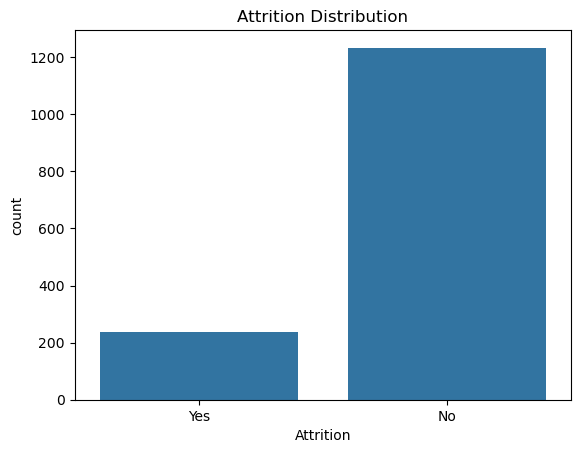

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Attrition", data=df)
plt.title("Attrition Distribution")
plt.show()


In [10]:
df["Attrition"].value_counts(normalize=True) * 100


Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

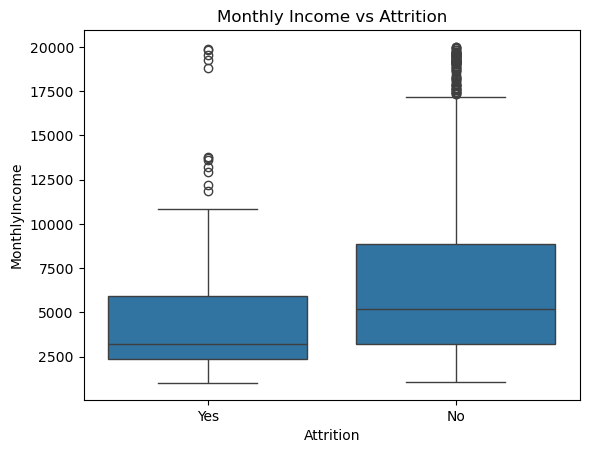

In [11]:
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df)
plt.title("Monthly Income vs Attrition")
plt.show()


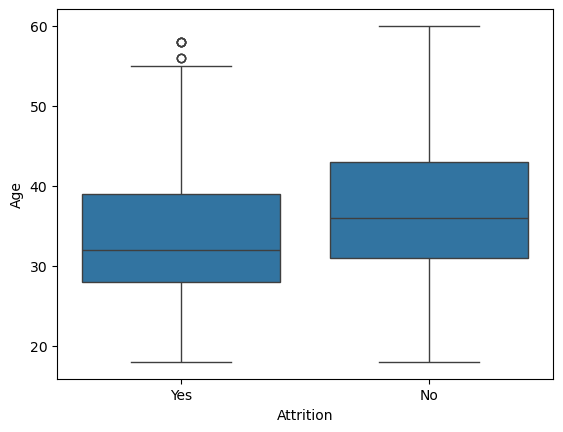

In [12]:
sns.boxplot(x="Attrition", y="Age", data=df)
plt.show()


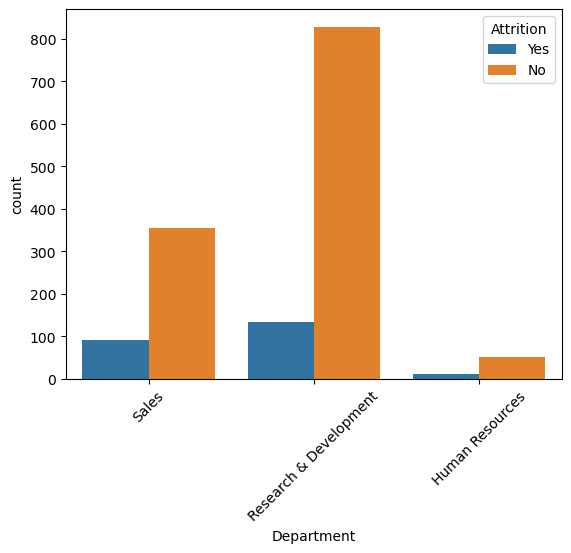

In [13]:
sns.countplot(x="Department", hue="Attrition", data=df)
plt.xticks(rotation=45)
plt.show()


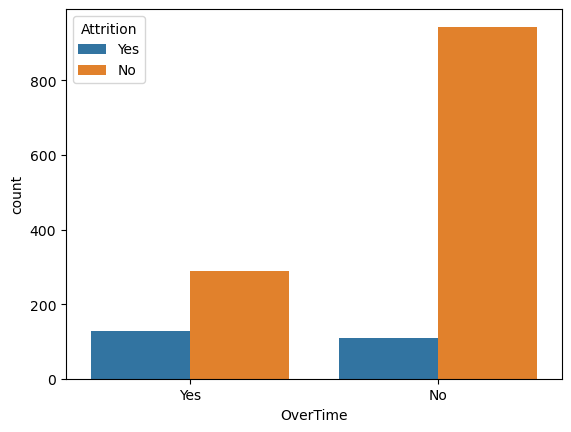

In [14]:
sns.countplot(x="OverTime", hue="Attrition", data=df)
plt.show()


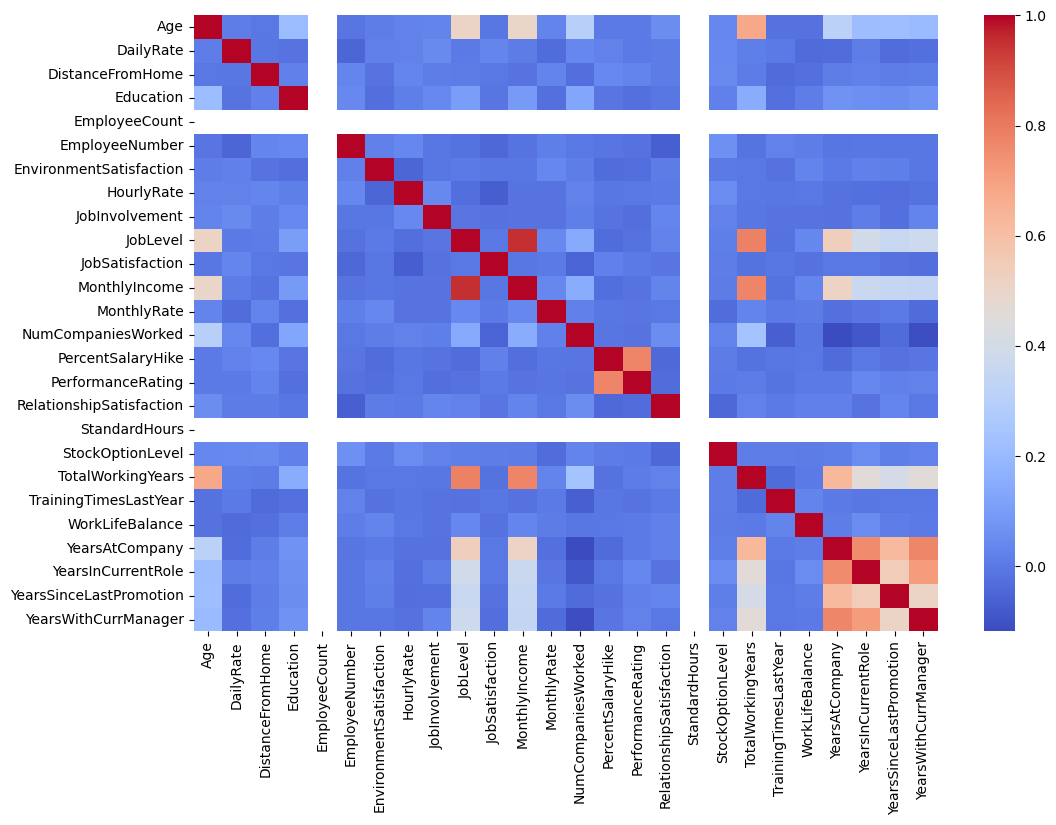

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")
plt.show()


In [16]:
# Shape
print("shape:", df.shape)

# Data types
print(df.dtypes.value_counts())

# Unique values check
df.nunique().sort_values()


shape: (1470, 35)
int64     26
object     9
Name: count, dtype: int64


Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

In [17]:
df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'], 
        axis=1, inplace=True)


In [18]:
num_cols = df.select_dtypes(include=np.number).columns
num_cols


Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

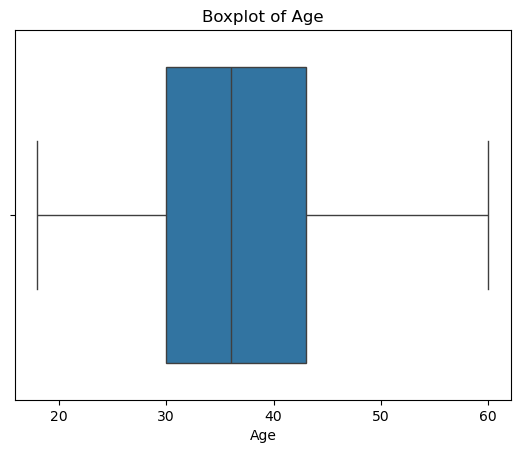

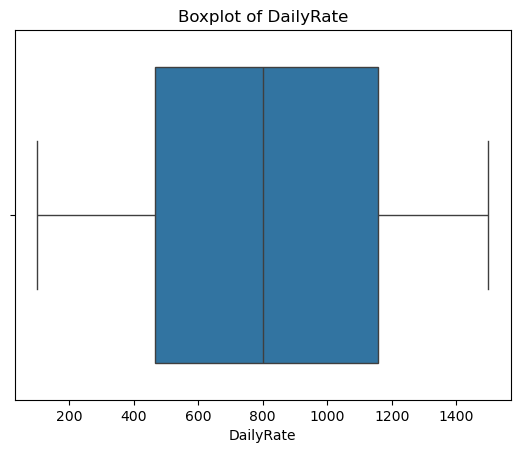

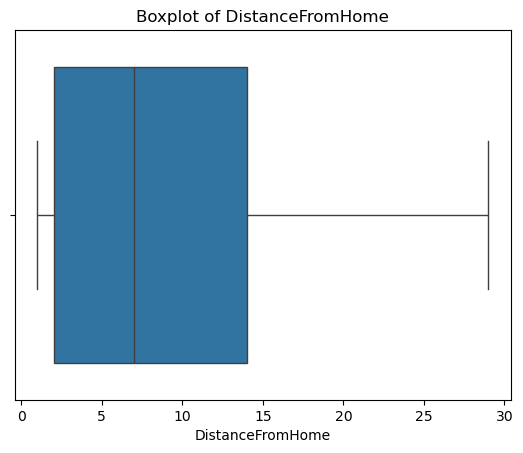

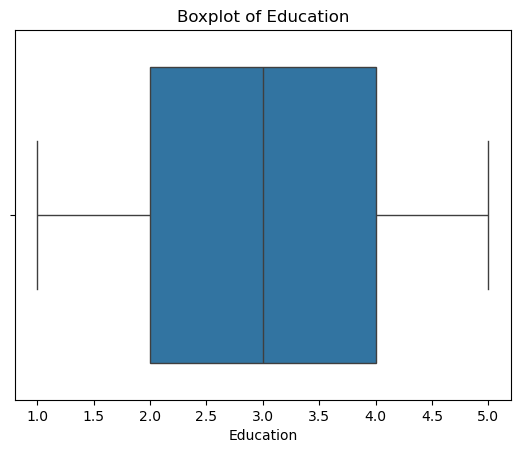

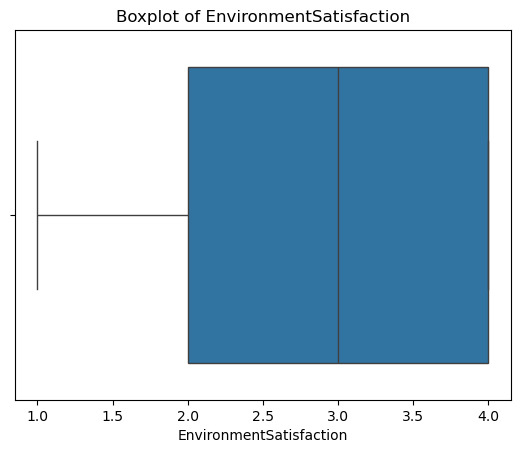

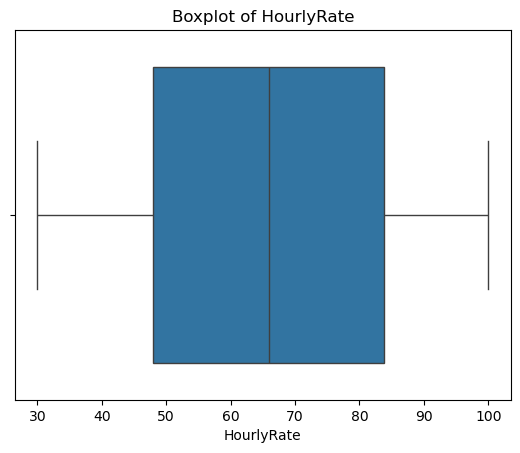

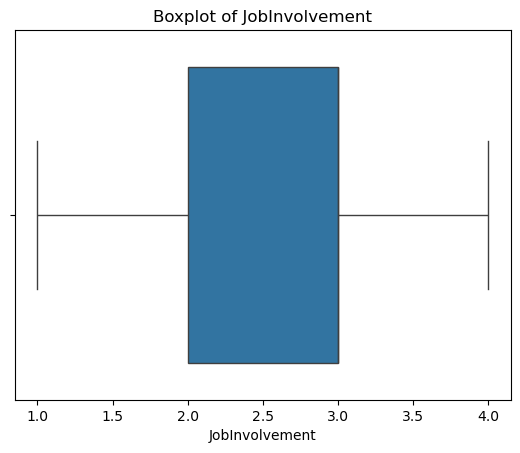

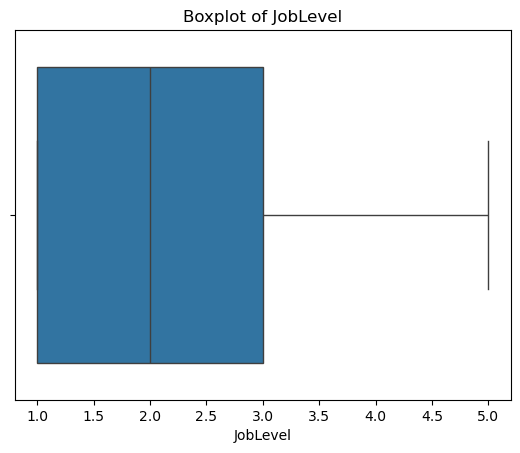

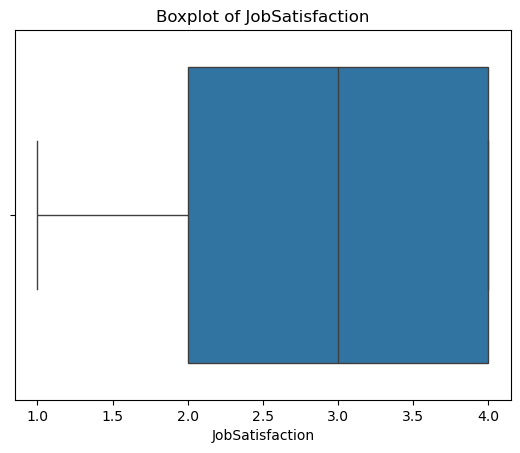

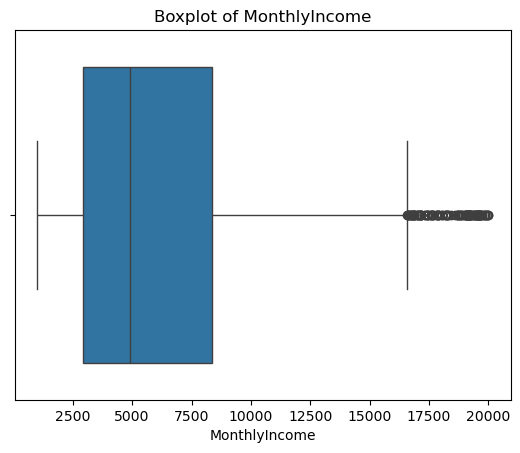

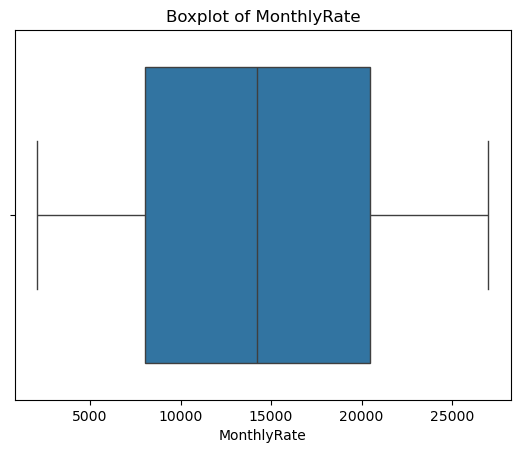

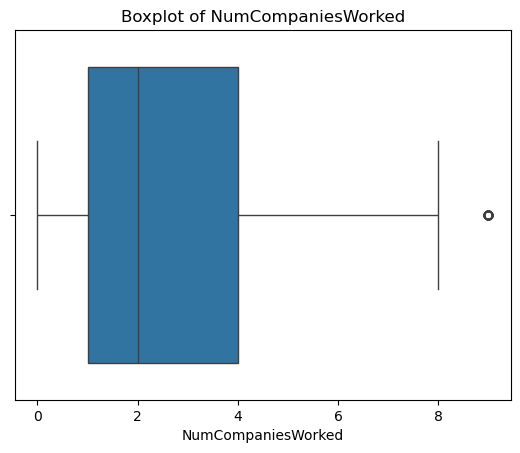

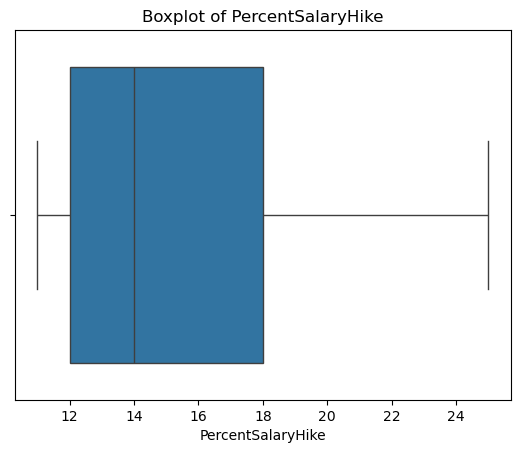

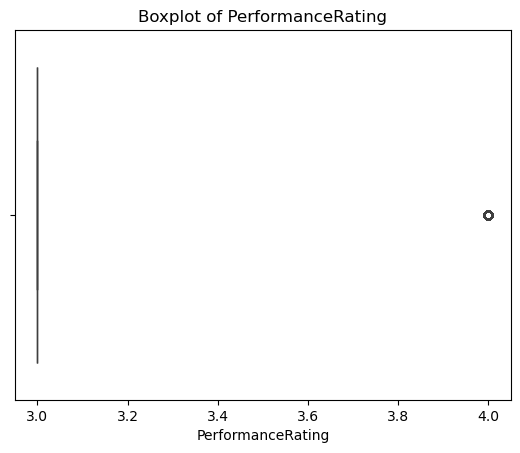

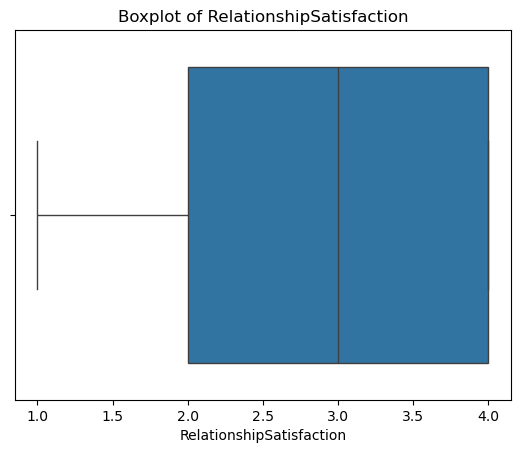

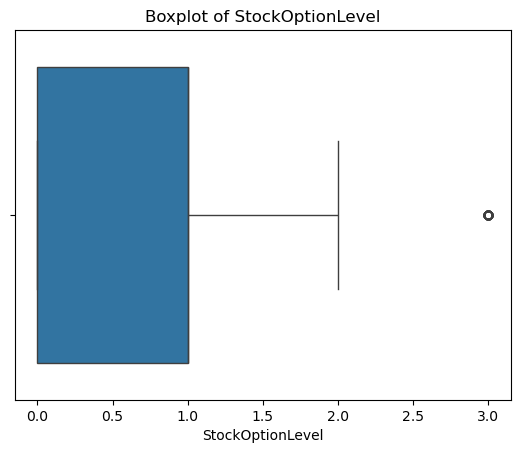

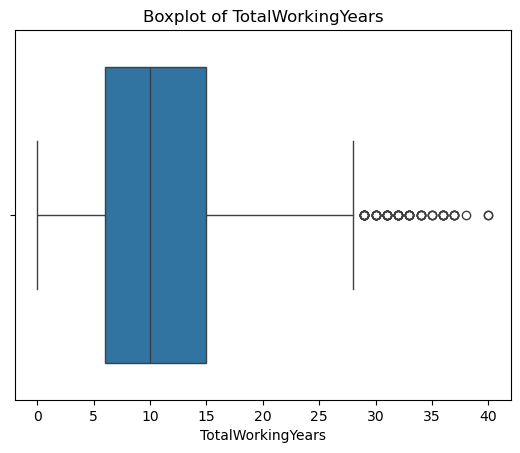

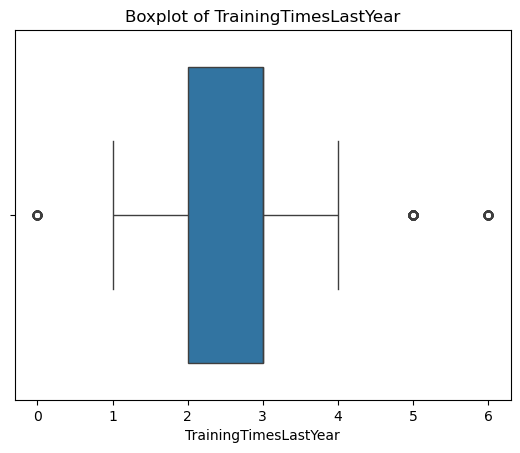

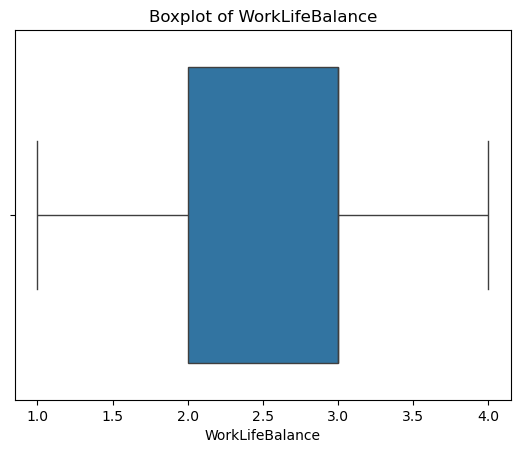

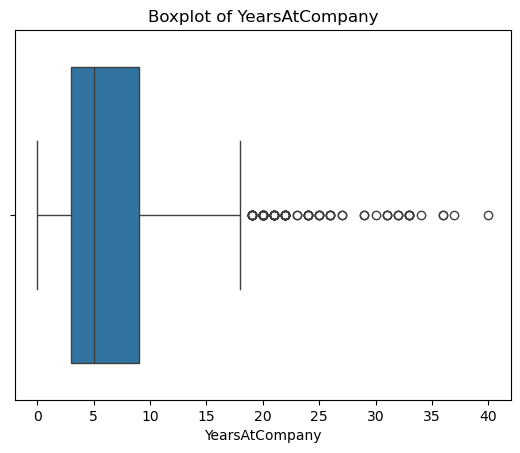

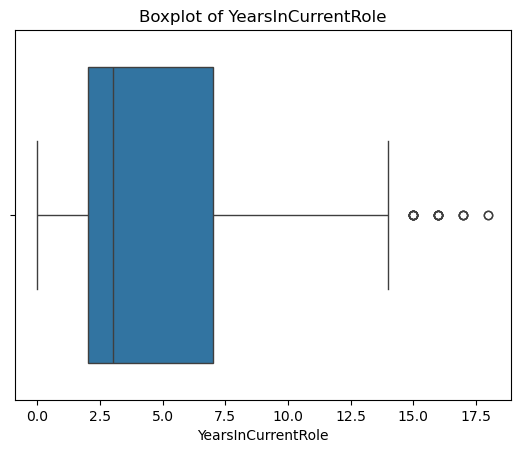

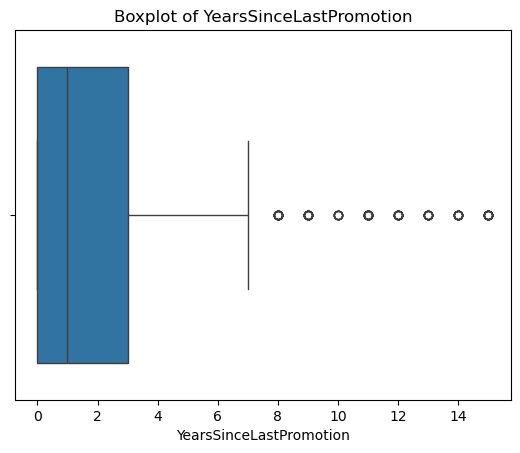

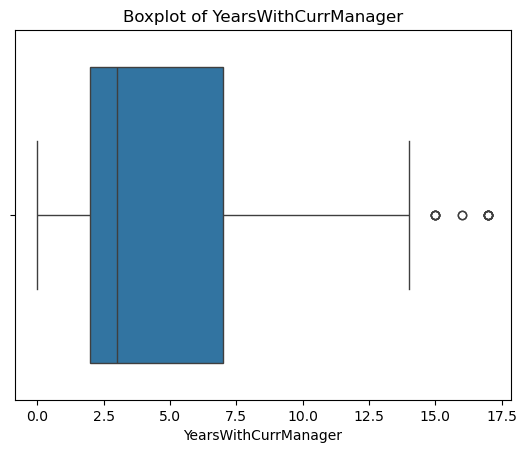

In [19]:
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [20]:
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return len(outliers)

for col in num_cols:
    print(col, ":", detect_outliers(df, col))


Age : 0
DailyRate : 0
DistanceFromHome : 0
Education : 0
EnvironmentSatisfaction : 0
HourlyRate : 0
JobInvolvement : 0
JobLevel : 0
JobSatisfaction : 0
MonthlyIncome : 114
MonthlyRate : 0
NumCompaniesWorked : 52
PercentSalaryHike : 0
PerformanceRating : 226
RelationshipSatisfaction : 0
StockOptionLevel : 85
TotalWorkingYears : 63
TrainingTimesLastYear : 238
WorkLifeBalance : 0
YearsAtCompany : 104
YearsInCurrentRole : 21
YearsSinceLastPromotion : 107
YearsWithCurrManager : 14


In [21]:
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    data[column] = np.where(data[column] > upper, upper,
                            np.where(data[column] < lower, lower,
                                     data[column]))
    
for col in num_cols:
    cap_outliers(df, col)


In [22]:
df[num_cols].skew().sort_values(ascending=False)


YearsSinceLastPromotion     1.262563
MonthlyIncome               1.168595
JobLevel                    1.025401
NumCompaniesWorked          0.971516
DistanceFromHome            0.958118
YearsAtCompany              0.900774
TotalWorkingYears           0.855518
PercentSalaryHike           0.821128
YearsInCurrentRole          0.803704
YearsWithCurrManager        0.741000
StockOptionLevel            0.664714
Age                         0.413286
TrainingTimesLastYear       0.117931
MonthlyRate                 0.018578
PerformanceRating           0.000000
DailyRate                  -0.003519
HourlyRate                 -0.032311
Education                  -0.289681
RelationshipSatisfaction   -0.302828
EnvironmentSatisfaction    -0.321654
JobSatisfaction            -0.329672
JobInvolvement             -0.498419
WorkLifeBalance            -0.552480
dtype: float64

In [23]:
df["MonthlyIncome"] = np.log1p(df["MonthlyIncome"])


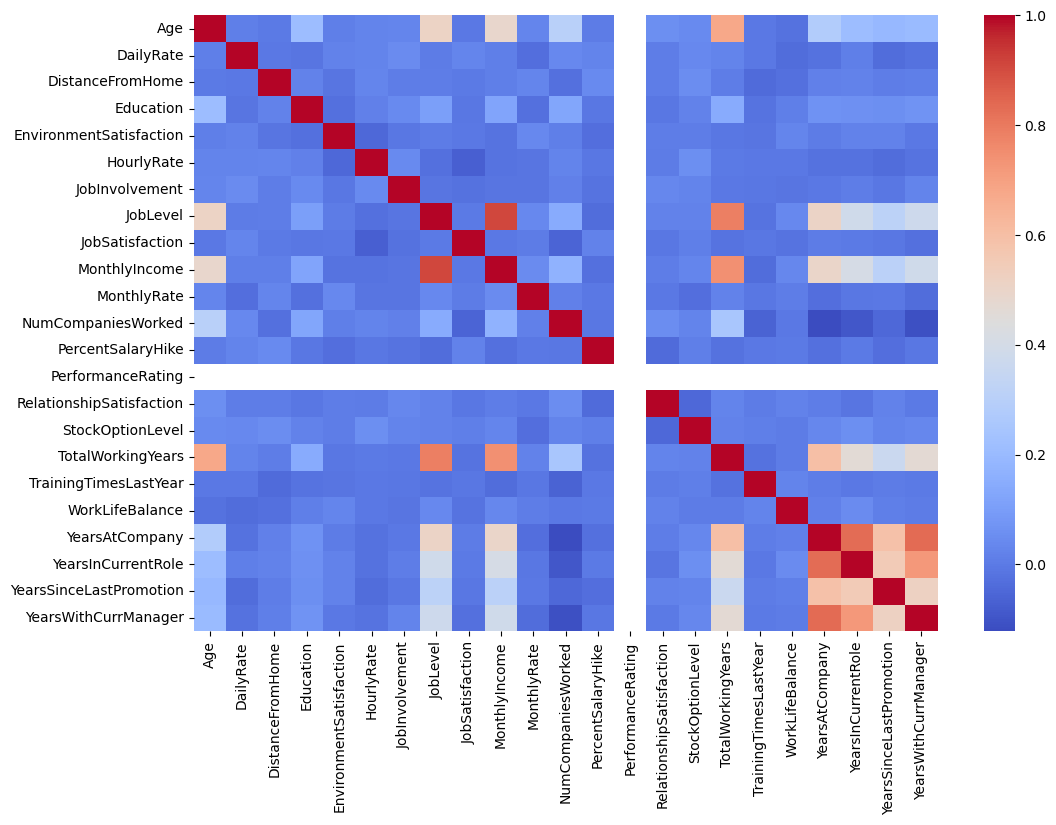

In [24]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.show()


In [25]:
corr_matrix["MonthlyIncome"].sort_values(ascending=False)


MonthlyIncome               1.000000
JobLevel                    0.910295
TotalWorkingYears           0.743233
YearsAtCompany              0.498078
Age                         0.491101
YearsInCurrentRole          0.407474
YearsWithCurrManager        0.383108
YearsSinceLastPromotion     0.309699
NumCompaniesWorked          0.169980
Education                   0.123132
MonthlyRate                 0.045648
WorkLifeBalance             0.033390
StockOptionLevel            0.030008
DailyRate                   0.012814
DistanceFromHome            0.009458
RelationshipSatisfaction    0.006050
JobSatisfaction            -0.004710
JobInvolvement             -0.016791
EnvironmentSatisfaction    -0.017013
HourlyRate                 -0.017476
PercentSalaryHike          -0.026318
TrainingTimesLastYear      -0.036016
PerformanceRating                NaN
Name: MonthlyIncome, dtype: float64

In [26]:
df["SalaryBand"] = pd.qcut(df["MonthlyIncome"], 4)

pd.crosstab(df["SalaryBand"], df["Attrition"], normalize="index") * 100


Attrition,No,Yes
SalaryBand,,
"(6.917, 7.977]",70.731707,29.268293
"(7.977, 8.501]",85.792350,14.207650
"(8.501, 9.034]",89.373297,10.626703
"(9.034, 9.716]",89.673913,10.326087


In [27]:
df["TenureBand"] = pd.cut(df["YearsAtCompany"], bins=[0,3,7,15,40])

pd.crosstab(df["TenureBand"], df["Attrition"], normalize="index") * 100


Attrition,No,Yes
TenureBand,,
"(0, 3]",75.117371,24.882629
"(3, 7]",87.288136,12.711864
"(7, 15]",89.230769,10.769231
"(15, 40]",90.579710,9.420290


In [28]:
from scipy.stats import ttest_ind

leave = df[df["Attrition"]=="Yes"]["MonthlyIncome"]
stay = df[df["Attrition"]=="No"]["MonthlyIncome"]

t_stat, p_val = ttest_ind(leave, stay)
print("P-value:", p_val)


P-value: 1.0976065803983475e-14


In [29]:
df["SalaryBand"] = pd.qcut(df["MonthlyIncome"], 4, labels=["Low","Mid-Low","Mid-High","High"])


In [30]:
salary_segment = pd.crosstab(df["SalaryBand"], df["Attrition"], normalize="index") * 100
print(salary_segment)


Attrition          No        Yes
SalaryBand                      
Low         70.731707  29.268293
Mid-Low     85.792350  14.207650
Mid-High    89.373297  10.626703
High        89.673913  10.326087


In [31]:
df["TenureBand"] = pd.cut(df["YearsAtCompany"],
                          bins=[0,3,7,15,40],
                          labels=["0-3","3-7","7-15","15+"])


In [32]:
tenure_segment = pd.crosstab(df["TenureBand"], df["Attrition"], normalize="index") * 100
print(tenure_segment)


Attrition          No        Yes
TenureBand                      
0-3         75.117371  24.882629
3-7         87.288136  12.711864
7-15        89.230769  10.769231
15+         90.579710   9.420290


In [33]:
combo_segment = pd.crosstab(
    [df["OverTime"], df["SalaryBand"]],
    df["Attrition"],
    normalize="index"
) * 100

print(combo_segment)


Attrition                   No        Yes
OverTime SalaryBand                      
No       Low         82.509506  17.490494
         Mid-Low     90.000000  10.000000
         Mid-High    93.023256   6.976744
         High        92.775665   7.224335
Yes      Low         41.509434  58.490566
         Mid-Low     73.958333  26.041667
         Mid-High    80.733945  19.266055
         High        81.904762  18.095238


In [34]:
df["PromotionGap"] = df["YearsAtCompany"] - df["YearsSinceLastPromotion"]


In [35]:
df["PromotionGapBand"] = pd.cut(df["PromotionGap"],
                                bins=[-1,1,3,6,20],
                                labels=["Recent","Moderate","Long","Very Long"])


In [36]:
promotion_segment = pd.crosstab(df["PromotionGapBand"], df["Attrition"], normalize="index") * 100
print(promotion_segment)


Attrition                No        Yes
PromotionGapBand                      
Recent            72.019465  27.980535
Moderate          84.814815  15.185185
Long              87.434555  12.565445
Very Long         91.891892   8.108108


High Risk Segment Identification

In [37]:
df["HighRisk"] = (
    (df["OverTime"] == "Yes") &
    (df["YearsAtCompany"] < 3) &
    (df["JobSatisfaction"] <= 2)
)


In [38]:
risk_segment = pd.crosstab(df["HighRisk"], df["Attrition"], normalize="index") * 100
print(risk_segment)


Attrition         No        Yes
HighRisk                       
False      85.045423  14.954577
True       41.025641  58.974359


In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X_numeric = df.select_dtypes(include=np.number)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_numeric.values, i)
                   for i in range(X_numeric.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))


                     Feature         VIF
23              PromotionGap         inf
21   YearsSinceLastPromotion         inf
19            YearsAtCompany         inf
13         PerformanceRating  915.372611
7                   JobLevel    7.226812
9              MonthlyIncome    6.138475
16         TotalWorkingYears    4.678779
20        YearsInCurrentRole    3.413828
22      YearsWithCurrManager    3.380051
0                        Age    2.040435
11        NumCompaniesWorked    1.269550
3                  Education    1.061258
15          StockOptionLevel    1.018774
5                 HourlyRate    1.018124
1                  DailyRate    1.017913
14  RelationshipSatisfaction    1.015227
8            JobSatisfaction    1.014964
6             JobInvolvement    1.014817
18           WorkLifeBalance    1.014575
10               MonthlyRate    1.013918
4    EnvironmentSatisfaction    1.013108
2           DistanceFromHome    1.011015
17     TrainingTimesLastYear    1.010864
12         Perce

c:\Users\nived\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


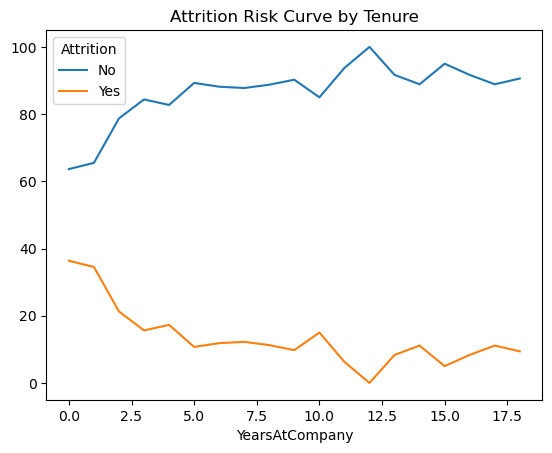

In [40]:
tenure_risk = pd.crosstab(
    df["YearsAtCompany"],
    df["Attrition"],
    normalize="index"
) * 100

tenure_risk.plot()
plt.title("Attrition Risk Curve by Tenure")
plt.show()


In [42]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,SalaryBand,TenureBand,PromotionGap,PromotionGapBand,HighRisk
0,41.0,Yes,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,Female,...,1.0,6.0,4.0,0.0,5.0,Mid-High,3-7,6.0,Long,False
1,49.0,No,Travel_Frequently,279.0,Research & Development,8.0,1.0,Life Sciences,3.0,Male,...,3.0,10.0,7.0,1.0,7.0,Mid-High,7-15,9.0,Very Long,False
2,37.0,Yes,Travel_Rarely,1373.0,Research & Development,2.0,2.0,Other,4.0,Male,...,3.0,0.0,0.0,0.0,0.0,Low,NaN,0.0,Recent,False
3,33.0,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,4.0,Female,...,3.0,8.0,7.0,3.0,0.0,Low,7-15,5.0,Long,False
4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,Male,...,3.0,2.0,2.0,2.0,2.0,Mid-Low,0-3,0.0,Recent,False


In [43]:
df.describe()


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PromotionGap
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,8.544818,...,2.712245,0.764966,11.103061,2.710884,2.761224,6.617687,4.207823,1.922789,4.107483,4.694898
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,0.649376,...,1.081209,0.782312,7.303828,1.037954,0.706476,4.989788,3.555335,2.478222,3.517487,4.056520
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,6.917706,...,1.000000,0.000000,0.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,7.976595,...,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,1.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,8.501061,...,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,4.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,9.033603,...,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,9.716073,...,4.000000,2.500000,28.500000,4.500000,4.000000,18.000000,14.500000,7.500000,14.500000,18.000000


In [45]:
df_original = pd.read_csv("../data/WA_Fn-UseC_-HR-Employee-Attrition.csv")


In [46]:
print("Original Columns:", df_original.shape[1])
print("Cleaned Columns:", df.shape[1])


Original Columns: 35
Cleaned Columns: 36


In [48]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,SalaryBand,TenureBand,PromotionGap,PromotionGapBand,HighRisk
0,41.0,Yes,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,Female,...,1.0,6.0,4.0,0.0,5.0,Mid-High,3-7,6.0,Long,False
1,49.0,No,Travel_Frequently,279.0,Research & Development,8.0,1.0,Life Sciences,3.0,Male,...,3.0,10.0,7.0,1.0,7.0,Mid-High,7-15,9.0,Very Long,False
2,37.0,Yes,Travel_Rarely,1373.0,Research & Development,2.0,2.0,Other,4.0,Male,...,3.0,0.0,0.0,0.0,0.0,Low,NaN,0.0,Recent,False
3,33.0,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,4.0,Female,...,3.0,8.0,7.0,3.0,0.0,Low,7-15,5.0,Long,False
4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,Male,...,3.0,2.0,2.0,2.0,2.0,Mid-Low,0-3,0.0,Recent,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,No,Travel_Frequently,884.0,Research & Development,23.0,2.0,Medical,3.0,Male,...,3.0,5.0,2.0,0.0,3.0,Low,3-7,5.0,Long,False
1466,39.0,No,Travel_Rarely,613.0,Research & Development,6.0,1.0,Medical,4.0,Male,...,3.0,7.0,7.0,1.0,7.0,High,3-7,6.0,Long,False
1467,27.0,No,Travel_Rarely,155.0,Research & Development,4.0,3.0,Life Sciences,2.0,Male,...,3.0,6.0,2.0,0.0,3.0,Mid-High,3-7,6.0,Long,False
1468,49.0,No,Travel_Frequently,1023.0,Sales,2.0,3.0,Medical,4.0,Male,...,2.0,9.0,6.0,0.0,8.0,Mid-High,7-15,9.0,Very Long,False


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv("../data/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# If OverTime = Yes → 10 hours per day
# If OverTime = No → 8 hours per day

df['DailyHours'] = df['OverTime'].apply(lambda x: 10 if x == 'Yes' else 8)

# Assume 22 working days per month
df['MonthlyWorkingHours'] = df['DailyHours'] * 22

In [5]:
df['Salary_per_hour'] = df['MonthlyIncome'] / df['MonthlyWorkingHours']

In [6]:
dept_avg = df.groupby('Department')['Salary_per_hour'].mean()

df['Expected_salary'] = df['Department'].map(dept_avg)

In [7]:
df['Salary_Percentage'] = (
    df['Salary_per_hour'] / df['Expected_salary']
) * 100

In [8]:
def salary_category(x):
    if x < 90:
        return "Underpaid"
    elif x <= 110:
        return "Fair"
    else:
        return "Overpaid"

df['Salary_Category'] = df['Salary_Percentage'].apply(salary_category)

In [9]:
pd.crosstab(df['Salary_Category'], df['Attrition'], normalize='index') * 100

Attrition,No,Yes
Salary_Category,,
Fair,93.129771,6.870229
Overpaid,90.000000,10.000000
Underpaid,79.647965,20.352035
